In [ ]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Creación del DataFrame
df = pd.read_excel('FuelConsumptionCo2.xlsx')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
941,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
942,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
943,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


<Axes: >

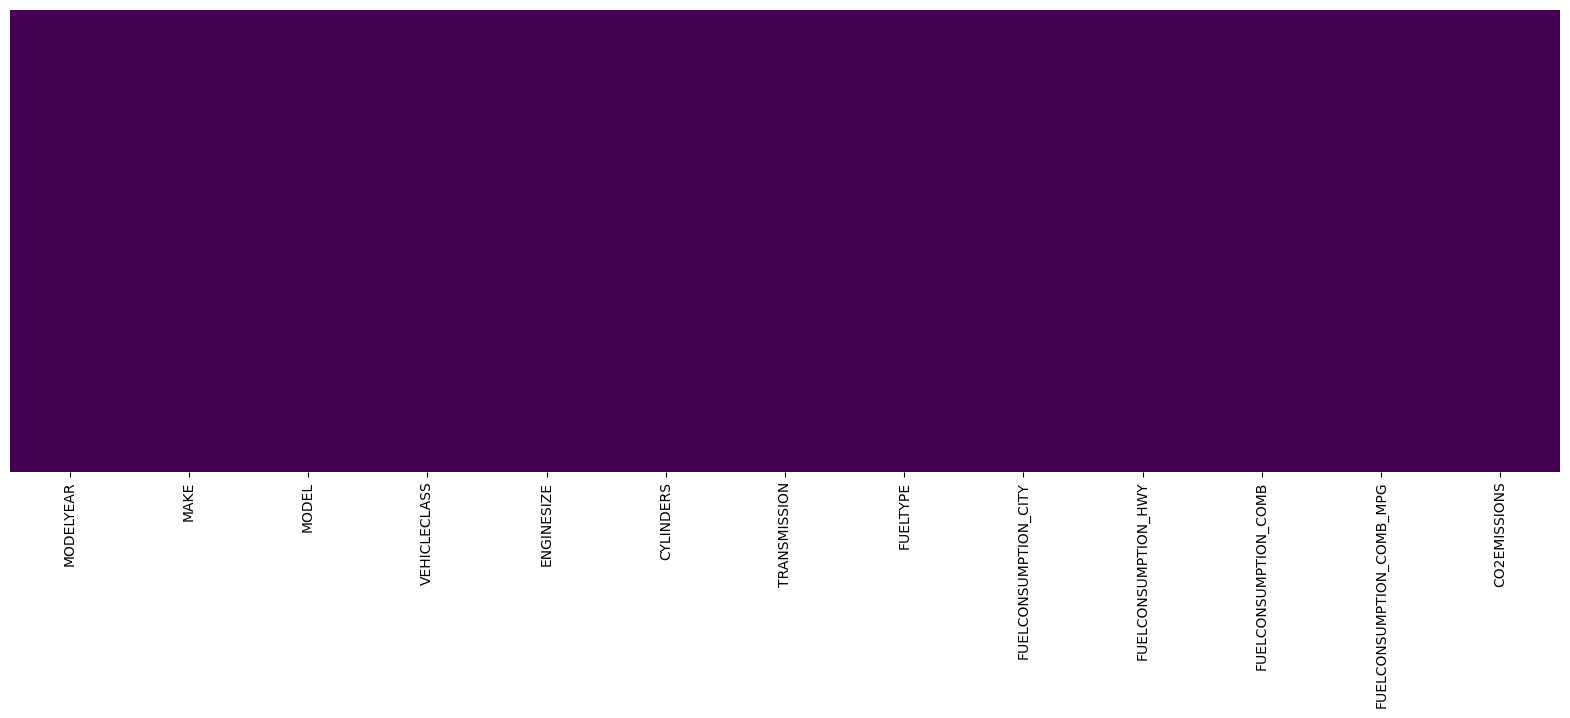

In [ ]:
# Visualización para corroborar que no hay datos faltantes
# En este caso no existen datos nulos
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
# Se eliminan las columnas de tipo categóricas
df.drop(['MODELYEAR','MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE'], axis=1, inplace=True)
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.4,4,9.9,7.0,8.6,33,200
1,3.5,6,12.6,9.4,11.2,25,263
2,2.0,4,11.0,8.6,9.9,29,232
3,2.0,4,11.3,9.1,10.3,27,242
4,2.0,4,11.2,8.0,9.8,29,230
...,...,...,...,...,...,...,...
940,2.0,4,10.7,7.7,9.4,30,219
941,2.0,4,10.5,8.1,9.4,30,219
942,2.0,4,11.0,8.7,9.9,29,232
943,2.0,4,11.5,8.4,10.1,28,236


In [ ]:
# Creación de variables que contienen datos en X y Y
x_data = df.drop('CO2EMISSIONS', axis=1)
y_data = df['CO2EMISSIONS']
x_data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2.4,4,9.9,7.0,8.6,33
1,3.5,6,12.6,9.4,11.2,25
2,2.0,4,11.0,8.6,9.9,29
3,2.0,4,11.3,9.1,10.3,27
4,2.0,4,11.2,8.0,9.8,29
...,...,...,...,...,...,...
940,2.0,4,10.7,7.7,9.4,30
941,2.0,4,10.5,8.1,9.4,30
942,2.0,4,11.0,8.7,9.9,29
943,2.0,4,11.5,8.4,10.1,28


In [54]:
y_data

0      200
1      263
2      232
3      242
4      230
      ... 
940    219
941    219
942    232
943    236
944    252
Name: CO2EMISSIONS, Length: 945, dtype: int64

In [ ]:
# Separación de datos previamente creados en forma de datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=1)

# Regresión Linear Múltiple

In [ ]:
# Importación y entrenamiento de un Modelo de Regresión Linear Múltiple
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Impresión de Intercepto y coeficientes resultantes del modelo
print('Intercepto: ', linreg.intercept_)
print('Coeficientes: ', linreg.coef_)

Intercepto:  124.05613100622469
Coeficientes:  [-0.01515148  6.43036425 -1.32628678  0.52702525 14.53834062 -1.88292508]


In [ ]:
# Predicción de los datos en Y
y_hat = linreg.predict(x_test)

In [ ]:
# Se importa e imprimen las métricas correspondientes para la evaluación del modelo
from sklearn import metrics
print('Valor de R Cuadrada: ', metrics.r2_score(y_test, y_hat))
print('Valor de Error Absluto Medio: ', metrics.mean_absolute_error(y_test, y_hat))
print('Valor de Error Cuadrático Medio: ', metrics.mean_squared_error(y_test, y_hat))
print('Raíz de Valor de Error Cuadrático Medio: ', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

Valor de R Cuadrada:  0.9775327964689396
Valor de Error Absluto Medio:  6.418322097986178
Valor de Error Cuadrático Medio:  85.97881014782185
Raíz de Valor de Error Cuadrático Medio:  9.272475944849997


# Regresión Ridge CV

In [ ]:
# Importación y creación de una regresión lineal con RidgeCV
from sklearn.linear_model import RidgeCV

# Se realiza un rango de alphas que el modelo probará para determinar cuál es el óptimo
alpha_range = 10.0 ** np.arange(-2,3)

ridgeregcv = RidgeCV(alphas=alpha_range, scoring='neg_mean_squared_error')
ridgeregcv.fit(x_train, y_train)

# Se imprime el alpha óptimo obtenido
print('Valor de Alpha Óptimo: ', ridgeregcv.alpha_)

Valor de Alpha Óptimo:  100.0


In [ ]:
# Impresión de Intercepto y coeficientes resultantes del modelo
print('Intercepto: ', ridgeregcv.intercept_)
print('Coeficientes: ', ridgeregcv.coef_)

Intercepto:  129.98702013615178
Coeficientes:  [ 1.15258677  5.30842335  4.44225152  4.49815493  4.55653156 -1.95117901]


In [ ]:
# Predicción de los datos en 'Y' ahora con el modelo Ridge CV
y_hat = ridgeregcv.predict(x_test)

In [ ]:
# se imprimen las métricas correspondientes para la evaluación del modelo RidgeCV
print('Valor de R Cuadrada: ', metrics.r2_score(y_test, y_hat))
print('Valor de Error Absluto Medio: ', metrics.mean_absolute_error(y_test, y_hat))
print('Valor de Error Cuadrático Medio: ', metrics.mean_squared_error(y_test, y_hat))
print('Raíz de Valor de Error Cuadrático Medio: ', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

Valor de R Cuadrada:  0.9779646398338965
Valor de Error Absluto Medio:  6.348640227896123
Valor de Error Cuadrático Medio:  84.32620667013978
Raíz de Valor de Error Cuadrático Medio:  9.182930178877534


# Regresión Lasso CV

In [ ]:
# Importación y creación de una regresión lineal con LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, random_state=1)
lassoregcv.fit(x_train, y_train)
print('Alpha Óptimo: ', lassoregcv.alpha_)

Alpha Óptimo:  0.45442206714715017


In [ ]:
# Impresión de Intercepto y coeficientes resultantes del modelo
print('Intercepto: ', lassoregcv.intercept_)
print('Coeficientes: ', lassoregcv.coef_)

Intercepto:  126.10535289477238
Coeficientes:  [ 0.          6.14099602  5.4462973   5.62023828  2.61988286 -1.90585504]


In [ ]:
# Predicción de los datos en 'Y' ahora con el modelo RidgeCV
y_hat = lassoregcv.predict(x_test)

In [ ]:
# se imprimen las métricas correspondientes para la evaluación del modelo LassoCV
print('Valor de R Cuadrada: ', metrics.r2_score(y_test, y_hat))
print('Valor de Error Absluto Medio: ', metrics.mean_absolute_error(y_test, y_hat))
print('Valor de Error Cuadrático Medio: ', metrics.mean_squared_error(y_test, y_hat))
print('Raíz de Valor de Error Cuadrático Medio: ', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

Valor de R Cuadrada:  0.9775539332111336
Valor de Error Absluto Medio:  6.405732289229922
Valor de Error Cuadrático Medio:  85.89792282503045
Raíz de Valor de Error Cuadrático Medio:  9.268113228971172


# Conclusiones
Todos los modelos dieron resultados favorables y bastante similiares, las métricas a pesar de no variar demasiado, las diferencias que existen nos hacen concluir que el modelo Ridge CV fue la opción más precisa, ya que el valor de R cuadrada es ligeramente superior a los otros dos, en cuanto el valor de Error Medio Absoluto es el más bajo, indicando que RidgeCV entrega el menor margen de error, lo mismo sucede con el Error Cuadrático Medio y la Raíz del Error Cuadrático Medio que de igual manera en RidgeCV sus valores son los menores, lo que indicaría que no hay demasiada penlización.